In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
!pip freeze > requirements.txt

In [4]:
pd.read_csv('preu lloguer per trimestre i barri.csv')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


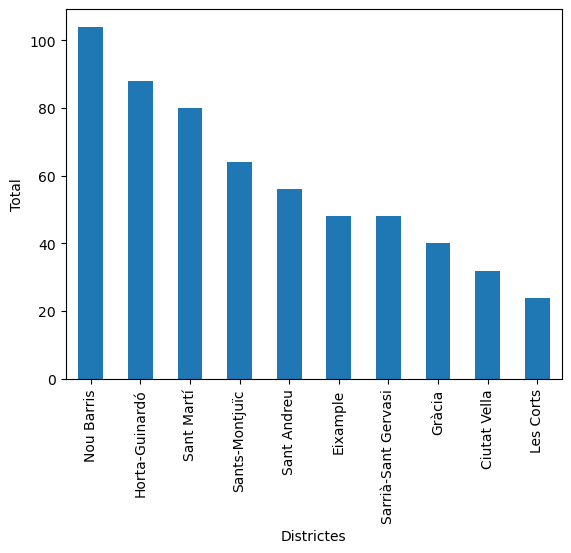

In [29]:
#Total registres asociats a cada Dsitricte

bcn = pd.read_csv('preu lloguer per trimestre i barri.csv')
districtes = bcn['Nom_Districte'].value_counts()
districtes.plot(kind='bar')
plt.xlabel('Districtes')
plt.ylabel('Total')

plt.savefig("registres-districte.jpg", bbox_inches='tight')

plt.show()



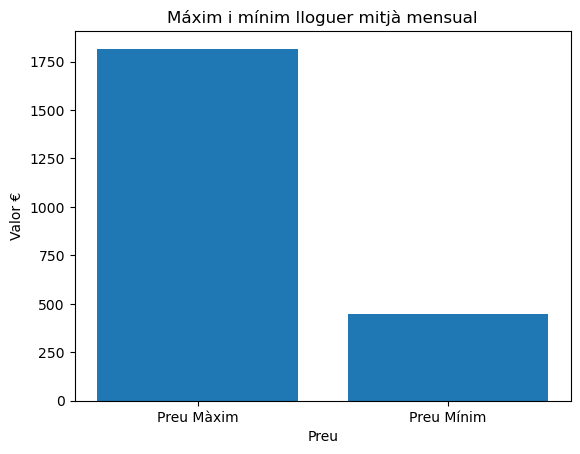

In [30]:
lloguer_mitja = bcn[bcn['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].copy()


lloguer_mitja['Preu'] = pd.to_numeric(lloguer_mitja['Preu'], errors='coerce')
lloguer_mitja['Preu'] = pd.to_numeric(lloguer_mitja['Preu'], errors='coerce')

preu_maxim = lloguer_mitja['Preu'].max()
preu_minim = lloguer_mitja['Preu'].min()

plt.bar(['Preu Màxim', 'Preu Mínim'], [preu_maxim, preu_minim])

plt.xlabel('Preu')
plt.ylabel('Valor €')
plt.title('Máxim i mínim lloguer mitjà mensual')

plt.savefig("Màxim_Mínim.jpg", bbox_inches='tight')

plt.show()

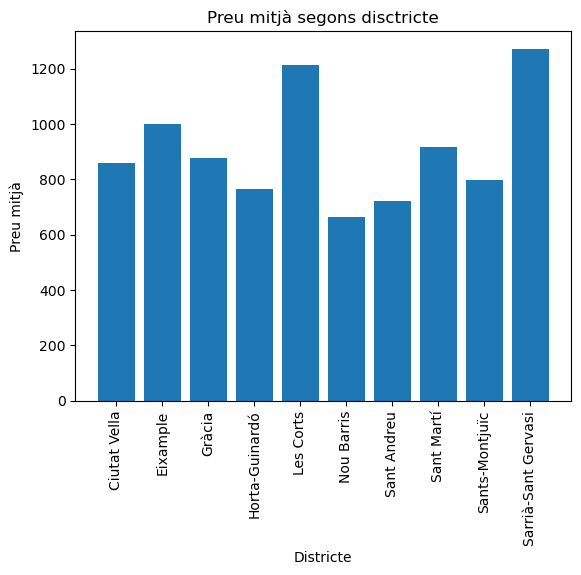

In [32]:
bcn['Preu'] = pd.to_numeric(bcn['Preu'], errors='coerce')


bcn_filtered = bcn[bcn['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

# Agrupar por 'Nom_Districte' y calcular el promedio de 'Preu'
bcn_grouped = bcn_filtered.groupby('Nom_Districte')['Preu'].mean()

# Crear la gráfica de barras
plt.bar(bcn_grouped.index, bcn_grouped.values)
plt.xlabel('Districte')
plt.ylabel('Preu mitjà')
plt.title('Preu mitjà segons disctricte')

plt.xticks(rotation='vertical')

plt.savefig("Preu mitjà segons disctricte")

plt.show()

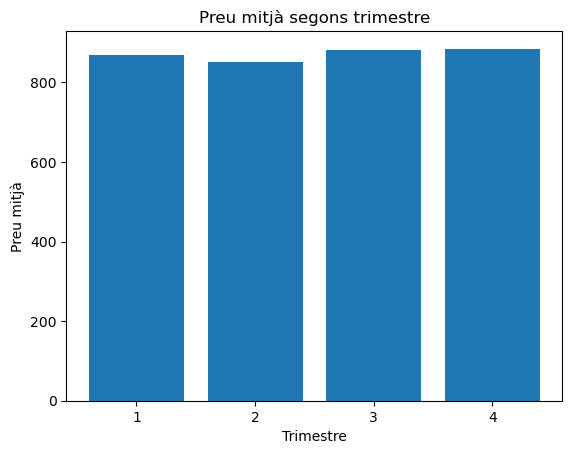

In [33]:

import pandas as pd
import matplotlib.pyplot as plt


bcn = pd.read_csv('preu lloguer per trimestre i barri.csv', dtype={'Trimestre': str})

bcn['Preu'] = pd.to_numeric(bcn['Preu'], errors='coerce')


bcn_filtered = bcn[bcn['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

trimestres = bcn_filtered['Trimestre'].unique()


bcn_tri=bcn_filtered.groupby('Trimestre')['Preu'].mean()

plt.bar(trimestres,bcn_tri)

plt.xlabel('Trimestre')
plt.ylabel('Preu mitjà')
plt.title('Preu mitjà segons trimestre')

plt.savefig("Preu mitjà segons trimestre.jpeg")

plt.show()



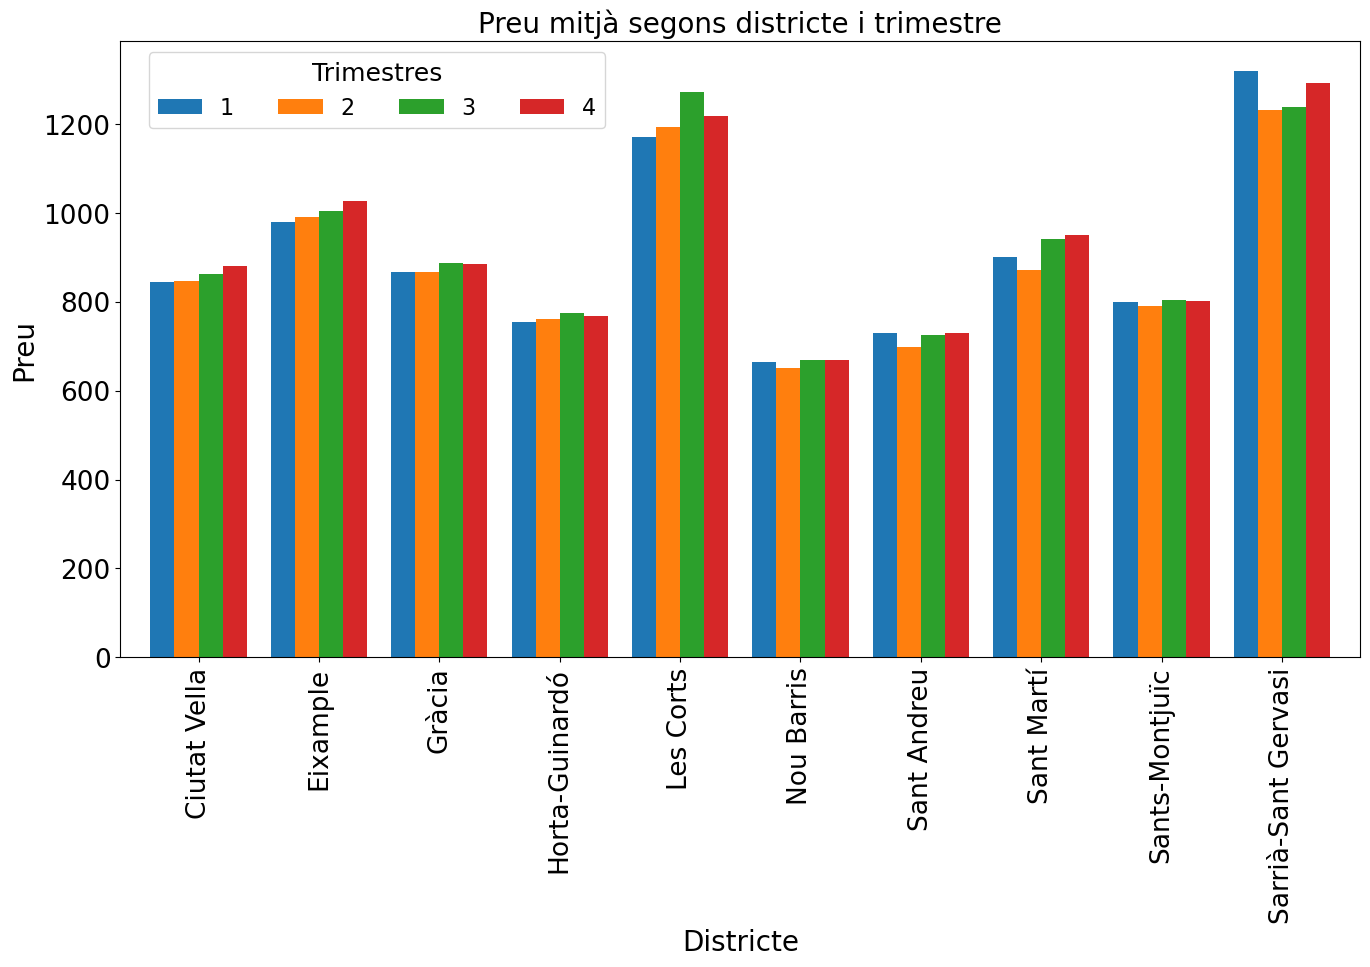

In [35]:

import pandas as pd
import matplotlib.pyplot as plt


bcn_filtered = bcn[bcn['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

bcn_grouped = bcn_filtered.groupby(['Nom_Districte', 'Trimestre'])['Preu'].mean().unstack()

fig, ax = plt.subplots(figsize=(16, 8)) 

ax.text

barra = bcn_grouped.plot(kind='bar', stacked=False, width=0.8, ax=ax)


barra.legend(loc='upper right', bbox_to_anchor=(0.4, 1), ncol=4, fontsize= 16, title= 'Trimestres', title_fontsize=18)


plt.xlabel('Districte', fontsize=20)
plt.ylabel('Preu', fontsize=20)
plt.title('Preu mitjà segons districte i trimestre',  fontsize=20)

plt.xticks(fontsize=19) 
plt.yticks(fontsize=19)


plt.savefig("Preu mitjà segons districte i trimestre.jpeg")


plt.show()




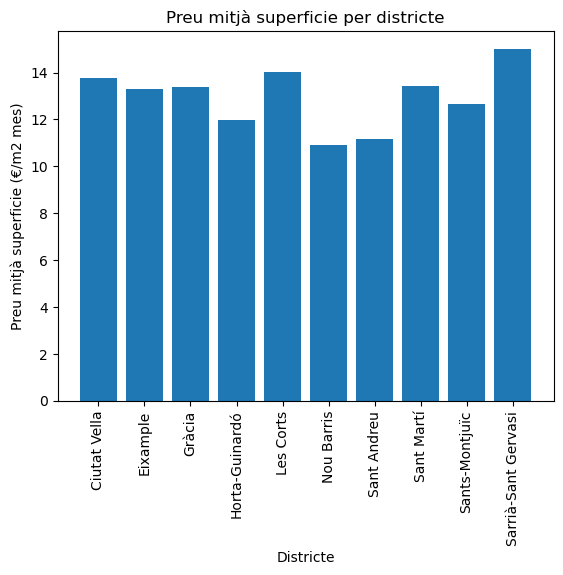

In [45]:
bcn['Preu'] = pd.to_numeric(bcn['Preu'], errors='coerce')


bcn_filtered = bcn[bcn['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']

# Agrupar por 'Nom_Districte' y calcular el promedio de 'Preu'
bcn_grouped = bcn_filtered.groupby('Nom_Districte')['Preu'].mean()

# Crear la gráfica de barras
plt.bar(bcn_grouped.index, bcn_grouped.values)
plt.xlabel('Districte')
plt.ylabel('Preu mitjà superficie (€/m2 mes)')
plt.title('Preu mitjà superficie per districte')

plt.xticks(rotation='vertical')

plt.savefig("Preu mitjà superficie per districte.jpeg")

plt.show()

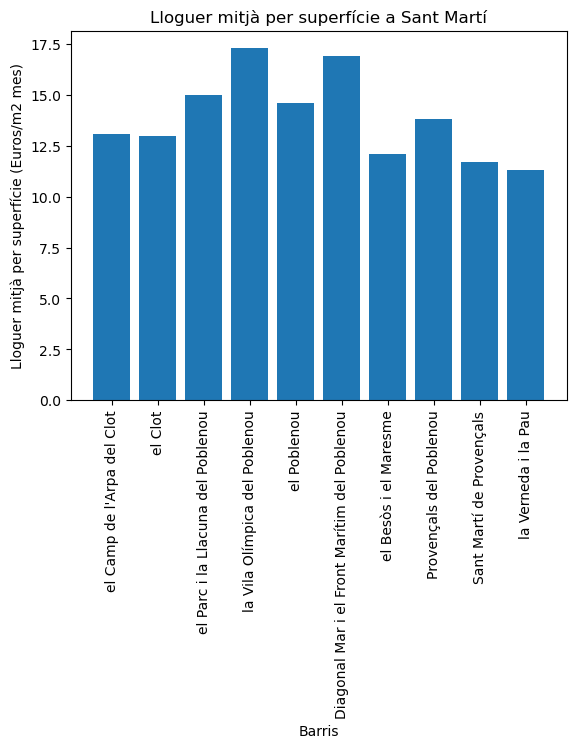

In [44]:
import matplotlib.pyplot as plt


bcn_sant_marti = bcn[(bcn['Nom_Districte'] == 'Sant Martí') & (bcn['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)')]

nom_barri = bcn_sant_marti['Nom_Barri']

preu = bcn_sant_marti['Preu']

plt.bar(nom_barri, preu)
plt.xlabel('Barris')
plt.ylabel('Lloguer mitjà per superfície (Euros/m2 mes)')
plt.title('Lloguer mitjà per superfície a Sant Martí')

plt.xticks(rotation='vertical')

plt.savefig("Lloguer mitjà per superfície de Sant Martí.png", bbox_inches='tight')

plt.show()
